## This notebook generates a bench of plot to show different parameters of task performance

### This notebook is used after data processing to plot the data. Do not play with it lightly inside the master folder (load_preprocess_mouse)

### This notebook is relying on the load_Rat_documentation folder which is doing preprocessing the files generated durting the experiments and generate for each experiment the class Data

#### 1. Only modifiy if you are sure of what you are doing and that you are solving a bug
#### 2. If you do modify you MUST commit this modification using bitbucket
#### 3. If you want to play whis notebook (to understand it better) copy it on a toy folder distinct from the master folder
#### 4. If you want to modify this code (fix bug, improve, add attributes ...) it is recommanded  to first duplicate in a draft folder. Try to keep track of your change.
#### 5. When you are ready to commit : # clear all output, clean everything between hashtag 


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import scipy
from scipy.interpolate import interp1d
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import collections  as mc
%matplotlib inline

import glob
import os
import platform
import pickle
import datetime
from scipy import stats

## The lines below allow to run required notebook from the master folder
if "__file__" not in dir():
    ThisNoteBookPath=os.path.dirname(os.path.realpath("__file__"))
    CommunNoteBookesPath=os.path.join(os.path.split(ThisNoteBookPath)[0],"load_preprocess_rat")
    os.chdir(CommunNoteBookesPath)
    
    %run loadRat_documentation.ipynb
    %run loadRawSpike_documentation.ipynb
    %run plotRat_documentation_1_GeneralBehavior.ipynb

if "__file__" not in dir():

    if platform.system()=='Linux':
        root="/data"
    else:
        root="/Users/davidrobbe/Documents/Data/"

    print("The path to data is %s"%root)


    
# INFO: all the default parameters for preprocessing (not used in the notebook, just for info)
defaultParam={
    "binSize":0.25,
    "trialOffset":20., #max end of trial, in seconds (position will be cutted)
    "sigmaSmoothPosition":0.1,  #smooth the position
    #"sigmaSmoothPosition":0.33 for pavel dataType
    "sigmaSmoothSpeed":0.3, #smooth the speed
    "positionDiffRange": [2.,5.], #min and max differences allowed between two consecutive positions
                                  #min to correct start, max to correct jumps
    "pawFrequencyRange":[2.,10.],
    "startAnalysisParams":[10,0.2,0.5],
    "cameraToTreadmillDelay":2., #seconds, usual time between camera start and treadmill start
    "nbJumpMax" : 100., #if jumps>nbJumpMax, trial is badly tracked
    
    #parameter to detect end of trial (first position minima)
    "endTrial_backPos":55,  # minima is after the animal went once to the back (after first time position>backPos)
    "endTrial_frontPos":30, # minima's position is in front of treadmill (position[end]<frontPos)
    "endTrial_minTimeSec":4, # minima is after minTimeSec seconds (time[end]>minTimeSec)
    }

The path to data is /data


### Load Data
Load the preprocess data (corrected and binned position, speed, median position, ...)
 DEFAULT: load pickle if they exist, or create them
data=Data(root,animal,experiment,param=param)

 OPTION 1: do not save any new pickle file
data=Data(root,animal,experiment,param,saveAsPickle=False)

 OPTION 2: redo the preprocessing with param, even if the pickle already exist
 (to be sure everything is preprocess with the same parameters)

In [44]:
#run only if inside this notebook (do not execute if "%run this_notebook")
if "__file__" not in dir():    
    
    experiment="Rat121_2017_02_14_18_33"
    animal= experiment[:6]
    
    param={
        "goalTime":7,
        "treadmillRange":[0,90],
        "maxTrialDuration":20,
        "interTrialDuration":10,
        "endTrial_frontPos":30,
        "endTrial_backPos":55, 
        "endTrial_minTimeSec":4,
        "binSize":0.25,
    }  
    data=Data(root,animal,experiment,param,redoPreprocess=True,PrintWarning=True)
    
    
#Description of the session parameters
    if data.hasBehavior:
        data.describe()
    

Preprocessing behavior data...
trial 25: only 3 unique positions, skip
trial 26: only 3 unique positions, skip
trial 27: only 2 unique positions, skip
trial 28: only 1 unique positions, skip
trial 29: only 2 unique positions, skip
trial 30: only 1 unique positions, skip
trial 31: only 1 unique positions, skip
trial 32: only 1 unique positions, skip
trial 33: only 1 unique positions, skip
trial 34: only 2 unique positions, skip
trial 35: only 2 unique positions, skip
trial 36: only 2 unique positions, skip
trial 37: only 1 unique positions, skip
trial 38: only 1 unique positions, skip
trial 39: only 1 unique positions, skip
trial 145: only 4 unique positions, skip
Preprocessing done
Session: Rat121_2017_02_14_18_33
Full Path: /data/Rat121/Experiments/Rat121_2017_02_14_18_33/Rat121_2017_02_14_18_33
Number of trials: 150
---------------------------------------------------------------------------------------------
**Name**                     **Type**   **Content**                    **Ext

### General plot behavior

/home/david/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:32: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


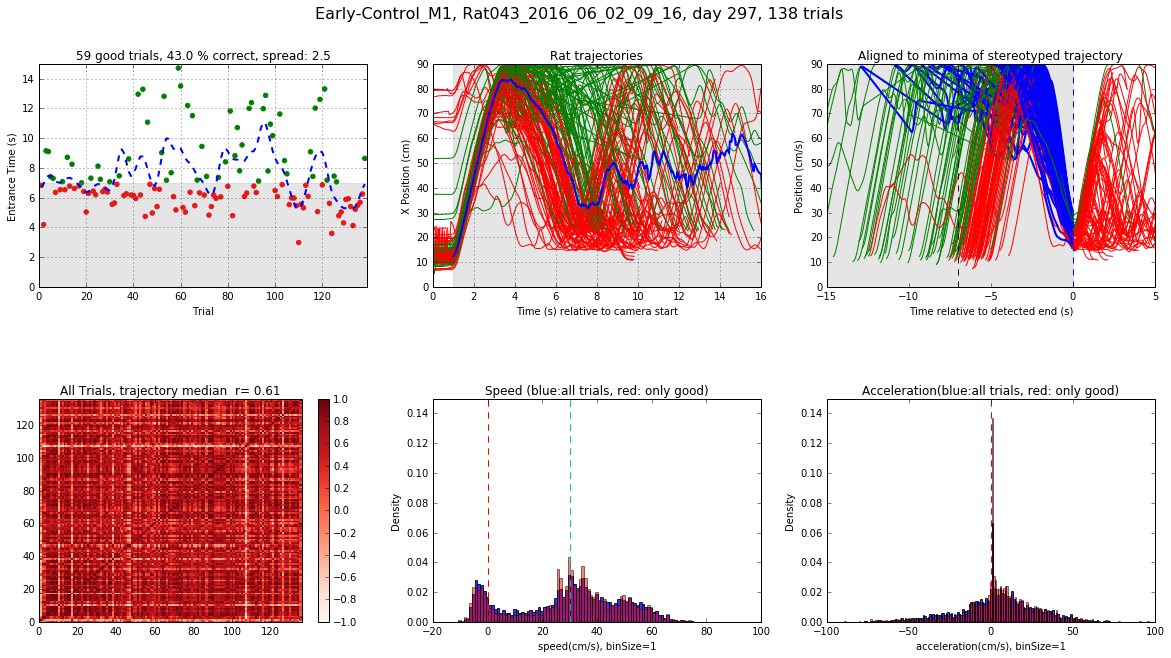

In [21]:
def plot_session_behavior(data):
    
    try :
        TagRat = data.Tag
        
            
    except AttributeError:
        TagRat=""
    
    
    
    
    fig=plt.figure(figsize=(20,10))
    
    
    
    plt.subplot(232)
    plot_positions(data)
    #plt.xlim(0,12)
    
    plt.subplot(233)
    plot_position_align_end_StereotypedTrials(data,onlyGood=False)
    
#     plt.subplot(334)
#     plot_position_align_end_AllTrials(data,onlyGood=False)
    
    
    plt.subplot(234)
    plot_correlation_position(data,onlyGood=False)

    plt.subplot(231)
    plot_entrance_time(data)
    
#     plt.subplot(338)
#     plot_correlation_entrance_time(data)
    
    plt.subplot(235)
    hist=plot_kinematic_histo(data,kinematic="speedSmoothBin",title="Speed",xlablel="speed(cm/s)",color='b',alpha=0.8)
    hist=plot_kinematic_histo(data,kinematic="speedSmoothBin",title="Speed",xlablel="speed(cm/s)",color='r',alpha=0.5,onlyGood=True)
    plt.title("Speed (blue:all trials, red: only good)")   
    plt.subplot(236)
    hist=plot_kinematic_histo(data,kinematic="accelerationOnSpeedSmoothBin",title="Acceleration",xlablel="acceleration(cm/s)",alpha=0.8)
    hist=plot_kinematic_histo(data,kinematic="accelerationOnSpeedSmoothBin",title="Acceleration",xlablel="acceleration(cm/s)",color='r',alpha=0.5,onlyGood=True)
    plt.title("Acceleration(blue:all trials, red: only good)")  
#     plt.subplot(332)
#     plot_mediantrajectory(data,onlyGood=False,raw=False)
#   plt.tight_layout()
    title=TagRat+ ", "+data.experiment+", day %s, %s trials"%(data.daySinceStart,data.nTrial)
    plt.suptitle(title,fontsize=16)
    fig.subplots_adjust(hspace=.5)
#----------------------------------------------------------------------------------------------------------------------
if "__file__" not in dir():  
    plot_session_behavior(data)  
    
    #path=os.path.join(root,"Analysis")
    #pathFig=os.path.join(path,"Rat051_2016_05_06_16_04.png")
    #plt.savefig(pathFig)
    

In [ ]:
# # Looking at different time axes attributes
# if "__file__" not in dir():
#     trial=33
#     plt.plot(data.rawTime[trial],data.rawPosition[trial],'b-')
#     plt.plot(data.timeTreadmill[trial],data.position[trial],"g-")
#     plt.plot(data.timeBin,data.positionBin[trial],'ro')#centered
#     plt.plot(data.lickTime[trial],np.zeros(len(data.lickTime[trial])),'mo')
#     plt.ylabel("position(cm)")
#     plt.xlabel("time(s)")
#     plt.ylim(-5, 90)
#     print(data.maxTrialDuration)

## Plot Behavioral data : TreadmillOn
###  Different position representations (trajectories of the animal)

In [ ]:
if "__file__" not in dir():
    trial=0
    plt.figure(figsize=(12,8))
    plt.subplot(325)
    for trial in data.trials:
        plt.plot(data.timeBin,data.positionBin[trial],'k-',alpha=0.2)
    plt.plot(data.timeBin,data.medianPosition,'r');
    plt.title("Median of corrected position");

    plt.subplot(322)
    plt.plot(data.timeBin,data.positionBin[trial],'bo-')
    plt.title("position smooth and binned for trial %s"%trial+'\n cut at the end of trial')
    plt.legend();
    
    plt.subplot(324)
    for trial in data.positionAlignEnd:
        plt.plot(data.timeAlignEnd,data.positionAlignEnd[trial],'k-',alpha=0.2)
    plt.title("Position align on end (%s)"%len(data.positionAlignEnd))
    
    plt.subplot(323)
    for trial in data.trials:
        plt.plot(data.timeBin,data.positionBin[trial],'k-',alpha=0.2)
    plt.title("Position align on treadmill start")
    
    plt.subplot(326)
    for trial in data.positionAlignEnd:
        plt.plot(data.timeAlignEnd,data.positionAlignEnd[trial],'k-',alpha=0.2)

    plt.plot(data.timeAlignEnd,data.medianPositionAlignEnd,'r')
    plt.title("median align on end")
    
    plt.subplot(321)
    trial=40
    plt.plot(data.timeTreadmill[trial],data.position[trial])
    plt.title("position(smooth, no bin), aligned on treadmill start")

### Positions, percentile, correlation

  - `onlyGood (False/True)`: plot/compute only on good trials
  - `raw (False/True)`: use raw positions. If False, use the corrected smoothed position.

In [ ]:
def get_positions_array_beginning(data,onlyGood=False,raw=False):
    '''
    Return all the position in one array, between startFrame (treadmill start) and stopFrame (treadmill stop)
    '''
    if raw:
        posDict=data.rawPosition
    else:
        posDict=data.position
    #the mean goal time, converted in number of frames    
    
    #put all positions in a 2D array
    allTraj=[]
    pos={}
    for trial in posDict:
        if onlyGood and (trial not in data.goodTrials):
            continue
        start = int(data.startFrame[trial])
        stop = int(data.stopFrame[trial])#endIndex#int(data.startFrame[trial]+size)
        pos[trial]=posDict[trial][start:stop]
    if len(pos)>0:
        size=np.max([len(pos[trial]) for trial in pos])

    for trial in pos:
        #pad with nan at the end if too short (entrance time < mean goal time)
        if len(pos[trial])<(size):
            pos[trial]=np.append(pos[trial],[np.nan] * (size-len(pos[trial])))
        allTraj.append(pos[trial])
    
    allTraj=np.asarray(allTraj)
    return allTraj

In [ ]:

#----------------------------------------------------------------------------------------------------------------------
def plot_positions(data,onlyGood=False,raw=False):
    '''
    Plot the positions (green=good trial, red=other), aligned on camera start
    Plot the percentile (25%, 50%, 75%) on the beginning (trial start to trial stop (treadmill stop))
    '''
    if raw:
        posDict=data.rawPosition
    else:
        posDict=data.position
    time=data.rawTime #align on camera
    
    for trial in posDict:
        color="green"
        if trial not in data.goodTrials:
            if onlyGood:
                continue
            color="red"

        plt.plot(time[trial][:data.stopFrame[trial]],posDict[trial][:data.stopFrame[trial]],color=color)
        
    #Get the positions between trial start and mean goal time
    allTraj=get_positions_array_beginning(data,onlyGood=onlyGood,raw=raw)
    #Check that the array is not empty
    if allTraj.shape[0]==0:
        if onlyGood:
            plt.title("0 Good trials")
        plt.title("No positions")
        return False

    #plot the percentiles
    trajP=np.nanpercentile(allTraj,[25, 50, 75],axis=0)
    time=(np.arange(allTraj.shape[1])/data.cameraSamplingRate)+data.cameraToTreadmillDelay
    #plt.plot(time,trajP[0],"b--",lw=2)
    plt.plot(time,trajP[1],"b-",lw=2)
    #plt.plot(time,trajP[2],"b--",lw=2)
    #title, labels, grid
    plt.ylabel("X Position (cm)")
    plt.xlabel("Time (s) relative to camera start")
    #plt.xlim([0,max(data.entranceTime)])
    plt.xlim([0,16])
    plt.grid()
    plt.axvspan(time[0],time[-1],alpha=0.2,color="grey")
    title="Rat trajectories"
    plt.title(title)
    
#----------------------------------------------------------------------------------------------------------------------
def plot_correlation_position(data,onlyGood=False,raw=False):
    '''
    Compute the correlation of the position between trial start and trial stop (treadmill stop)
    Plot the matrix of correlation coefficients
    Returns the median of coefficients
    '''
    import pandas as pd
    allTraj=get_positions_array_beginning(data,onlyGood=onlyGood,raw=raw)
#     dav future modification. look at the last 40 trials    
#     if not onlyGood:
#         allTraj=allTraj[-40:,:]

    df = pd.DataFrame(allTraj.transpose())

    if allTraj.shape[0]<3:
        title="Not enough trials"
        med=np.nan
    else:
        corMatrix=np.array(df.corr())
        
        pp=plt.pcolor(corMatrix,vmin=-1,vmax=1,cmap="Reds")
        plt.colorbar(pp)
        plt.xlim([0,corMatrix.shape[0]])
        plt.ylim([0,corMatrix.shape[1]])
        #median of upper triangle of matrix. carefull not to take the 
        coef=corMatrix[np.tril_indices(corMatrix.shape[0],-1)]
        #print(len(coef))
        med=np.nanmedian(coef)
        maxSecond=allTraj.shape[1]/float(data.cameraSamplingRate)
        #title of the plot
        title=""
        if onlyGood:
            title="Good Trials"
        else:
            title="All Trials"
        
        title+=', trajectory median  r= %.2f'%med     
    plt.title(title)
    #print(med)
    return med
     
#----------------------------------------------------------------------------------------------------------------------
if "__file__" not in dir():
    plt.figure(figsize=(15,10))
    plt.subplot(221)
    plot_positions(data,onlyGood=True)
    plt.subplot(222)
    plot_correlation_position(data,onlyGood=True,raw=False)
    plt.subplot(223)
    plot_positions(data,raw=True)
    plt.subplot(224)
    med=plot_correlation_position(data,onlyGood=False,raw=False)

In [ ]:
def plot_mediantrajectory(data,onlyGood=False,raw=False):
    '''
    Plot the positions (green=good trial, red=other), aligned on camera start
    Plot the percentile (25%, 50%, 75%) on the beginning (trial start to trial stop (treadmill stop))
    '''
    if raw:
        posDict=data.rawPosition
    else:
        posDict=data.position
    time=data.rawTime #align on camera   
    #Get the positions between trial start and mean goal time
    allTraj=get_positions_array_beginning(data,onlyGood=onlyGood,raw=raw)
    #Check that the array is not empty
    if allTraj.shape[0]==0:
        if onlyGood:
            plt.title("0 Good trials")
        plt.title("No positions")
        return False

    #plot the percentiles
    trajP=np.nanpercentile(allTraj,[25, 50, 75],axis=0)
    corr=np.zeros( allTraj.shape[0])
    median=trajP[1]
    for trial in range(allTraj.shape[0]):
        traj=allTraj[trial,:]
        corr[trial]=scipy.stats.spearmanr(median[~np.isnan(traj)],traj[~np.isnan(traj)])[0]
    time=(np.arange(allTraj.shape[1])/data.cameraSamplingRate)+data.cameraToTreadmillDelay
    plt.plot(time,trajP[0],"b--",lw=2)
    plt.plot(time,trajP[1],"b-",lw=2)
    plt.plot(time,trajP[2],"b--",lw=2)
    
    #Get the positions between trial start and mean goal time for good trial only
    allTraj=get_positions_array_beginning(data,onlyGood=True,raw=raw)
    #Check that the array is not empty
    if allTraj.shape[0]==0:
        if onlyGood:
            plt.title("0 Good trials")
        plt.title("No positions")
        return False

    #plot the percentiles
    trajP=np.nanpercentile(allTraj,[25, 50, 75],axis=0)
    corr=np.zeros( allTraj.shape[0])
    median=trajP[1]
    for trial in range(allTraj.shape[0]):
        traj=allTraj[trial,:]
        corr[trial]=scipy.stats.spearmanr(median[~np.isnan(traj)],traj[~np.isnan(traj)])[0]
    time=(np.arange(allTraj.shape[1])/data.cameraSamplingRate)+data.cameraToTreadmillDelay
    plt.plot(time,trajP[0],"r--",lw=2)
    plt.plot(time,trajP[1],"r-",lw=2)
    plt.plot(time,trajP[2],"r--",lw=2)
    
    #title, labels, grid
    plt.ylabel("X Position (cm)")
    plt.xlabel("Time (s) relative to camera start")
    #plt.xlim([0,max(data.entranceTime)])
    plt.xlim([0,16])
    plt.grid()
    title=""
    if raw:
        title="Median Raw "
    if not raw:
            title+="Median Smooth "
    if onlyGood:
        title+="trajectory %s good trials"%(len(data.goodTrials))
    else:
        title+="trajectory, %s good / %s trials"%(len(data.goodTrials),len(data.trials))
    title+=' , \n avg correlation of trajectories with the median trajectory '+np.str(np.round(np.mean(corr),2))
    title+="\n good trials in red"
    plt.title(title)
    plt.ylim(0,90)
    return trajP
if "__file__" not in dir():
    plot_mediantrajectory(data,onlyGood=False)
    #plot_mediantrajectory(data,onlyGood=True)

### Position align on end and correlation

The end of each trial trajectory is detected during preprocessing with the parameters:

 - "endTrial_backPos":55,  minima is after the animal went once to the back (after first time position>backPos)
 - "endTrial_frontPos":30,  minima's position is in front of treadmill (position[end]\<frontPos)
 - "endTrial_minTimeSec":4, minima is after minTimeSec seconds (time[end]>minTimeSec)

The detection is done on the corrected smoothed position.  
`data.indexEndTrial` contains the detected index for each trial. If the end could not be detected, `indexEndTrial[trial]=None`.  
For more details see Preprocess_treadmillOn_detailed_documentation.ipnb

  - `minTime (int)`: time in seconds to consider, relative to detected end  
    `minTime= -5` means "keep 5 seconds before the end", for each trial
  - `onlyGood (True/False)`: whether to keep only good trials
  - `raw (True/False)`: whether to use raw positions

In [ ]:
def get_positions_array_end_StereotypedTrials(data,onlyGood=False,raw=False):
    '''
    Returns array of position, align on detected end, between minTime and zero (0=end)
    The dectect end can be None, if so the trial is skipped
    If one position is too short (detected end is before minTime), 
      the position is pad at the beginning with nan values
    '''
    if raw:
        posDict=data.rawPosition
    else:
        posDict=data.position
    #number of frames to keep 
    cs=data.cameraSamplingRate
    size=np.max(data.maxTrialDuration)*cs#int(abs(minTime*cs))
    #put all positions in a 2D array
    allTraj=[]
    for trial in posDict:
        if onlyGood and (trial not in data.goodTrials):
            continue
        #index where the steretyped trajectory ends
        endIndex=data.indexEndTrial[trial]
        if isNone(endIndex):
            #no end was detected, skipp trial
            continue 
        #Position is cut between (end -minTime) and end.
        #At minima, the cut should begin at startFrame
        startIndex=data.startFrame[trial]
        pos=posDict[trial][startIndex:endIndex]
       
        if len(pos)<(size):
            #pos=np.append([pos[0]] * (size-len(pos)),pos) #if too short, pad the start with a plateau (Nan would cause trouble to compute speed later)
            pos=np.append([np.nan] * (size-len(pos)),pos)
        allTraj.append(pos)
    allTraj=np.asarray(allTraj)
    return allTraj
#----------------------------------------------------------------------------------------------------------------------
def plot_position_align_end_StereotypedTrials(data,xUpLimit=5,onlyGood=False):
    '''
    [minTime to 0] is the time range to measure the correlation, with 0=detected end
    xUpLimit is the x axis max limit
    onlyGood is whether to consider only good trials
    nb: data.timeEndTrial is computed with data.position
    '''
    cs=data.cameraSamplingRate
    for trial in data.position:
        end=data.timeEndTrial[trial]
        stop=data.stopFrame[trial]
        start=data.startFrame[trial]#+data.cameraToTreadmillDelay*data.cameraSamplingRate
        indexStart=np.argmax(data.position[trial])
        indexEnd=data.indexEndTrial[trial]
        if isNone(end):
            continue
        color="green"
        if trial not in data.goodTrials:
            if onlyGood:
                continue
            color="red"
        plt.plot(data.timeTreadmill[trial][start:stop]-end,data.position[trial][start:stop],color=color)
        plt.plot(data.timeTreadmill[trial][indexStart:indexEnd]-end,data.position[trial][indexStart:indexEnd],color="b",lw=2)
    plt.xlim([-15,xUpLimit])
    plt.ylabel("Position (cm/s)")
    plt.xlabel("Time relative to detected end (s)")
    plt.axvline(0,color="b",ls="--")
    plt.axvline(-np.mean(data.goalTime),color="k",ls="--")
    w="correct " if onlyGood else ""
    
    allTraj=get_positions_array_end_StereotypedTrials(data,onlyGood=onlyGood,raw=False)
    df = pd.DataFrame(allTraj.transpose())
    if allTraj.shape[0]<3:
        title="Not enough trials"
        med=np.nan
    else:
        corMatrix=np.array(df.corr())
        coeff=corMatrix[np.triu_indices(corMatrix.shape[0],1)]
        med=np.nanmedian(coeff)
    plt.title("Aligned to minima of stereotyped trajectory")    
    plt.axvspan(-np.max(data.maxTrialDuration),0,alpha=0.2,color="grey")
    return med
#----------------------------------------------------------------------------------------------------------------------
if "__file__" not in dir():
    #------------------------------------------------
    plt.figure(figsize=(20,10))
    plt.subplot(221)
    plot_position_align_end_StereotypedTrials(data,onlyGood=False)
    plt.subplot(222)
    plot_position_align_end_StereotypedTrials(data,onlyGood=True)

In [ ]:
if "__file__" not in dir():
    trial=35
    print(data.entranceTime[trial])
    plt.plot(data.timeTreadmill[trial],data.position[trial])
    plt.plot(data.timeTreadmill[trial][:data.stopFrame[trial]],data.position[trial][:data.stopFrame[trial]],'r')
    plt.axhline(data.position[trial][data.stopFrame[trial]-1])
    plt.axvline(data.entranceTime[trial])

In [ ]:
#----------------------------------------------------------------------
def get_positions_array_end_AllTrials(data,onlyGood=False,raw=False):
    '''
    Returns array of position, align on detected end, between minTime and zero (0=end)
    The dectect end can be None, if so the trial aligned to the treadmill stop time
    If one position is too short (detected end is before minTime), 
      the position is pad at the beginning with nan values
    '''
    if raw:
        posDict=data.rawPosition
    else:
        posDict=data.position
    #number of frames to keep 
    cs=data.cameraSamplingRate
    size=np.max(data.maxTrialDuration)*cs#int(abs(minTime*cs))
    #put all positions in a 2D array
    allTraj=[]
    for trial in posDict:
        if onlyGood and (trial not in data.goodTrials):
            continue
        #index where the steretyped trajectory ends
        endIndex=data.indexEndTrial[trial]
        if isNone(endIndex):
            #no end was detected, take stop treadmill time
            endIndex=data.stopFrame[trial]

        #Position is cut between (end -minTime) and end.
        #At minima, the cut should begin at startFrame
        startIndex=data.startFrame[trial]
        pos=posDict[trial][startIndex:endIndex]
       
        if len(pos)<(size):
            #pos=np.append([pos[0]] * (size-len(pos)),pos) #if too short, pad the start with a plateau (Nan would cause trouble to compute speed later)
            pos=np.append([np.nan] * (size-len(pos)),pos)
        allTraj.append(pos)
    allTraj=np.asarray(allTraj)
    return allTraj
#---------------------------------------------------------------------------------------------------------------------
def plot_position_align_end_AllTrials(data,xUpLimit=5,onlyGood=False):
    '''
    xUpLimit is the x axis max limit
    onlyGood is whether to consider only good trials
    nb: data.timeEndTrial is computed with data.position
    '''
    cs=data.cameraSamplingRate
    for trial in data.position:
        end=data.timeEndTrial[trial]
        stop=data.stopFrame[trial]
        start=data.startFrame[trial]#+data.cameraToTreadmillDelay*data.cameraSamplingRate
        indexStart=np.argmax(data.position[trial])
        indexEnd=data.indexEndTrial[trial]
        if isNone(end):
            end=data.timeTreadmill[trial][data.stopFrame[trial]-1]
            indexEnd=data.stopFrame[trial]
        color="green"
        if trial not in data.goodTrials:
            if onlyGood:
                continue
            color="red"
        plt.plot(data.timeTreadmill[trial][start:stop]-end,data.position[trial][start:stop],color=color)
        plt.plot(data.timeTreadmill[trial][indexStart:indexEnd]-end,data.position[trial][indexStart:indexEnd],color="b",lw=2)
    plt.xlim([-15,xUpLimit])
    plt.ylabel("Position (cm/s)")
    plt.xlabel("Time relative to detected end (s)")
    plt.axvline(0,color="b",ls="--")
    plt.axvline(-np.mean(data.goalTime),color="k",ls="--")
    w="correct " if onlyGood else ""
    
    allTraj=get_positions_array_end_StereotypedTrials(data,onlyGood=onlyGood,raw=False)
    df = pd.DataFrame(allTraj.transpose())
    if allTraj.shape[0]<3:
        title="Not enough trials"
        med=np.nan
    else:
        corMatrix=np.array(df.corr())
        coeff=corMatrix[np.triu_indices(corMatrix.shape[0],1)]
        med=np.nanmedian(coeff)
    plt.title("Aligned to treadmill stop or minima of steretyped trajectory, \n median r=%.2f" %(med))    
    plt.axvspan(-np.max(data.maxTrialDuration),0,alpha=0.2,color="grey")
    return med

#----------------------------------------------------------------------------------------------------------------------
if "__file__" not in dir():

    plt.figure(figsize=(20,10))
    plt.subplot(221)
    plot_position_align_end_AllTrials(data,onlyGood=False)
    plt.subplot(222)
    plot_position_align_end_AllTrials(data,onlyGood=True)

### Speed

Treadmill speed has to taken into account to compute rat speed

` speed= treadmill speed - np.diff(position)*camera sampling rate `

positive speed= rat moving towards the front of the treadmill  
zero speed= rat not moving, dragged towards the end by the treadmill  
negative speed= rat moving towards the end, faster than the treadmill  

When the rat cross the beam, does the treadmill stop ? No it depends on its entrance time, the treadmill does not stop when the trial is bad (entrance time< goal time)

### Acceleration

` acceleration= np.diff(speed)*camera sampling rate `

In [ ]:
#---------------------------------------------------
def get_position_treadmillOn(data,trial):
    '''
    Compute position between treadmill start and treadmill stop, for one trial
    '''
    pos=data.position[trial]
    time=data.timeTreadmill[trial]
    start=data.startFrame[trial]   
    stoptime=time[-1]
    cs=data.cameraSamplingRate
    if data.entranceTime[trial]>=data.goalTime[trial]:
        stoptime = data.entranceTime[trial]
    stopList=np.where(time>=stoptime)[0]
    try:
        stop=stopList[0]
    except IndexError:
        stop=-1
    if data.dataType=="behav_param":
        stop=data.stopFrame[trial] 
    posCutted=pos[start:stop]
    timeCutted=time[start:stop]
    return posCutted,timeCutted
#---------------------------------------------------
def speed_from_pos(data,position,trial,sigmaSpeed=0.3):
    '''
    speed= (diff pos)* camera sampling rate -  treadmill speed 
    Speed can't be inferior to "- treadmill speed" (or even 0 ?)
    positive speed= rat moving towards the front of the treadmill
    negative speed= rat moving towards the end, faster than the treadmill
    '''
    cs=data.cameraSamplingRate
    tr=data.treadmillSpeed[trial]
    speed= tr - np.diff(position)*cs 
    speed[speed<(-tr)]=-tr
    speed=smooth(speed,sigmaSpeed*cs)
    return speed
#----------------------------------------------------------------------------------------------------------------------
def get_speed_treadmillON(data,trial,sigmaSpeed=0.3):
    '''
    Compute speed between treadmill start and treadmill stop, for one trial
    '''
    cs=data.cameraSamplingRate
    posCutted,timeCutted =  get_position_treadmillOn(data,trial)
    timeSpeed=(timeCutted[1:]+timeCutted[:-1])/2.0
    speed=speed_from_pos(data,posCutted,trial,sigmaSpeed)
    return speed,timeSpeed
#----------------------------------------------------------------------------------------------------------------------
def get_speed_end(data,trial,sigmaSpeed=0.3,minTime=-9):
    '''
    speed in the last 9 seconds (minTime=-9) (zero=detected end), for one trial
    '''
    cs=data.cameraSamplingRate
    endIndex=data.indexEndTrial[trial]
    if isNone(endIndex):
        return False, False
    pos=data.position[trial]
    cs=data.cameraSamplingRate
    startIndex=int(max(data.startFrame[trial],endIndex+(minTime*cs)))
    posCutted=pos[startIndex:endIndex]
    time=data.timeTreadmill[trial]-data.timeEndTrial[trial]
    timeCutted=time[startIndex:endIndex]
    timeSpeed=(timeCutted[1:]+timeCutted[:-1])/2.0
    speed=speed_from_pos(data,posCutted,trial,sigmaSpeed)
    return speed, timeSpeed
#----------------------------------------------------------------------------------------------------------------------
def plot_position_speed_acceleration(data,trial,sigmaSpeed=0.3):
    #plot position
    cs=data.cameraSamplingRate
    pos,time=get_position_treadmillOn(data,trial)
    plt.plot(time,pos,"k-",label="position")
    plt.ylabel("position (cm)")
    plt.xlabel("time (s)")
    # plot speed
   
    speed,timeSpeed=get_speed_treadmillON(data,trial,sigmaSpeed) 
    ax2=plt.gca().twinx()
    ax2.plot(timeSpeed,speed,color="red",label="speed")
    ax2.yaxis.label.set_color('red')
    ax2.tick_params(axis='y', colors='red') 
    ax2.set_ylabel("speed")
    plt.xlim([time[0],time[-1]])
    #plot acceleration
    timeAcceleration=timeSpeed[1:]
    cs=data.cameraSamplingRate
    acceleration= np.diff(speed)*cs
    ax2.plot(timeAcceleration,acceleration,color='blue',label="acceleration")
    
    #vertical and horizontal lines (treadmill speed, entrance time, startFrame)
    ax2.axhline(data.treadmillSpeed[trial],ls="--",color="g")
    ax2.axhline(0,ls="--",c="blue")
    ax2.axhline(-data.treadmillSpeed[trial],ls="--",color="g")
    plt.axvline(data.entranceTime[trial],color="purple")
    plt.axvline(data.maxTrialDuration[trial])
    plt.axvline(0,color="purple")

#----------------------------------------------------------------------------------------------------------------------
if "__file__" not in dir():
    plt.figure(figsize=(10,5))
    trial =5
    plt.subplot(211)
    plt.title("kinematics with raw time binning calculated here")
    plot_position_speed_acceleration(data,trial,sigmaSpeed=0.3)
    plt.xlim(0,25)
    plt.subplot(212)
    plt.title("Binned kinematics based on the class attributes")
    plt.plot(data.timeBin,data.positionBin[trial],"ko-",label="position")
    plt.plot(data.timeBin,data.speedSmoothBin[trial],"ro-",label="speed")
    plt.plot(data.timeBin,data.accelerationOnSpeedSmoothBin[trial],"bo-",label="acceleration")
    plt.legend(loc="best")
    plt.xlim(0,25)

In [ ]:
def plot_kinematic_histo(data,kinematic="speedSmoothBin",binSize=1,title="Distribution of speed",xlablel="speed(cm/s)",color='b',alpha=1,onlyGood=False):
    k=np.asarray([])
    for trial in data.trials:
        if (not onlyGood) or (trial in data.goodTrials):
            k=np.append(k,data.__dict__[kinematic][trial])          
    #check that the vector is not empty
    if len(k)==0:
        return np.nan   
    #histogram between min and max speed, with binSize
    k=k[~np.isnan(k)]
    mink=np.nanmin(k)
    maxk=np.nanmax(k)
    hist,bins=np.histogram(k,np.arange(mink,maxk+1,binSize),density=True)
    #plot histograme
    centers=(bins[:-1]+bins[1:])/2.0
    plt.bar(centers,hist,width=binSize,color=color,alpha=alpha)
    #title, labels
    if onlyGood:
        title+=" - %s good trials"%(len(data.goodTrials))
    plt.title(title)
    plt.xlabel(xlablel+", binSize=%s"%binSize)
    plt.ylabel("Density")
    
    #vertical lines for 0 and treadmill speed
    plt.axvline(0,color="r",ls="--")
    if kinematic=="speedSmoothBin":
        plt.axvline(np.nanmean(data.treadmillSpeed),color="c",ls="--")
        plt.xlim([-20,100])
    else:
        plt.xlim([-100,100])
    plt.ylim([0,0.15])
    return hist
#----------------------------------------------------------------------------------------------------------------------
if "__file__" not in dir():
    hist=plot_kinematic_histo(data,kinematic="speedSmoothBin",title="Speed ",xlablel="speed(cm/s)")
    plt.figure()
    hist=plot_kinematic_histo(data,kinematic="accelerationOnSpeedSmoothBin",title="Acceleration ",xlablel="acceleration(cm/s)")

In [ ]:
def plot_entrance_time(data,smoothSigma=2):
    #Get the entrance time for the correctly tracked trials
    entrance=[data.entranceTime[trial] for trial in data.trials]
    #Colors for good/bad trials
    colors=["green" if t in data.goodTrials else "red" for t in data.trials]
    #Scatter plot entrance time/ trial
    plt.scatter(data.realTrials,entrance,color=colors,marker="o")
    #Smooth line entrane time/ trial
    smoothEntrance=smooth(entrance,smoothSigma)
    plt.plot(data.realTrials,smoothEntrance,"b--",linewidth=2)
    #Horizontal line: maxTrial duration
    plt.plot(data.realTrials,[data.maxTrialDuration[t] for t in data.trials],"k--")
    #mean goal time
    goal=np.nanmean(data.goalTime)
    plt.axhspan(0,goal,alpha=0.2,color="grey")
    sesionpercent=np.round(len(data.goodTrials)/float(data.nTrial) *100)
    entrancepercentile=np.nanpercentile(entrance,[25,75],axis=0)
    spread=np.round(entrancepercentile[1]-entrancepercentile[0],1)
    
    #limits, labels, title
    plt.ylim([0,15])
    plt.xlim([0,data.nTrial+1])
    plt.grid()
    plt.ylabel('Entrance Time (s)')
    plt.xlabel('Trial')
    plt.title("%s good trials, %s %% correct, spread: %s" %(len(data.goodTrials),sesionpercent,spread))

#----------------------------------------------------------------------------------------------------------------------
def plot_correlation_entrance_time(data,removeTimeout=False):    
    #entrance time with or without timeout
    if removeTimeout:
        entrance=[e for e,m in zip(data.entranceTime,data.maxTrialDuration) if e<m]
    else:
        entrance=data.entranceTime
    #remove nan/None
    entrance=[e for e in entrance if not isNone(e)]
    #check if not empty
    if not entrance:
        plt.title("No entrance times")
        return np.nan
    #plot entrance time n/entrance time n+1
    plt.plot(entrance[:-1],entrance[1:],"ko")
    plt.xlabel("Entrance time trial n")
    plt.ylabel("Entrance time trial n+1")
    #limits
    goal=np.nanmean(data.goalTime)
    m=max(goal,max(entrance))
    plt.ylim([0,m])
    plt.xlim([0,m])
    #diagonal and xspan
    plt.plot([0,m],[0,m],"k--")
    plt.axhspan(0,goal,alpha=0.2,color="grey")
    plt.axvspan(0,goal,alpha=0.2,color="grey")
    #spearman
    spearMan=scipy.stats.spearmanr(entrance[:-1],entrance[1:])
    if spearMan[1]<0.001:
        pvalue='p<0.001'
    else:
        pvalue='p= %.3f'%spearMan[1]
    plt.title("Correlation entrance times, Spearman r= %.2f, %s"%(spearMan[0],pvalue));  
    return spearMan[0]

#----------------------------------------------------------------------------------------------------------------------
def std_from_goaltime(data,removeTimeout=False):    
    #entrance time with or without timeout
    if removeTimeout:
        entrance=[e for e,m in zip(data.entranceTime,data.maxTrialDuration) if e<m]
    else:
        entrance=data.entranceTime
    #remove nan/None
    entrance=[e for e in entrance if not isNone(e)]
    #check if not empty
    if not entrance:
        return np.nan
    goal=np.nanmean(data.goalTime)
    #std from goal time
    ErrorStd=np.nanstd(np.abs(entrance-goal))
    #print(ErrorStd)

    return ErrorStd
    
#----------------------------------------------------------------------------------------------------------------------
if "__file__" not in dir():
    
    x=std_from_goaltime(data)
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plot_entrance_time(data)
    plt.subplot(122)
    plot_correlation_entrance_time(data)
    #plt.xlim([0,25]),plt.ylim([0,25])